In [1]:
import numpy as np
import pandas as pd
from operator import attrgetter
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Читаем данные

In [2]:
df_olist_customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kljuvak-pcp-fbf69/10projectfinalab/olist_customers_dataset.csv')

In [3]:
df_orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kljuvak-pcp-fbf69/10projectfinalab/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp',
                                                              'order_approved_at',
                                                              'order_delivered_carrier_date',
                                                              'order_delivered_customer_date',
                                                              'order_estimated_delivery_date'])

In [4]:
df_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-daniil-kljuvak-pcp-fbf69/10projectfinalab/olist_order_items_dataset.csv')

# EDA

### Клиенты

In [5]:
df_olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_olist_customers.shape

(99441, 5)

In [7]:
df_olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
df_olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Хочу убедиться что на customer_id и customer_unique_id лишь одна запись


In [9]:
df_olist_customers.groupby(['customer_id', 'customer_unique_id'], as_index=False).agg({'customer_zip_code_prefix':'count'})\
    .value_counts('customer_zip_code_prefix')

customer_zip_code_prefix
1    99441
dtype: int64

In [10]:
df_olist_customers.groupby('customer_state').agg({'customer_unique_id': 'nunique', 'customer_id': 'nunique'}) \
    .sort_values('customer_unique_id', ascending=False)

,customer_unique_id,customer_id
customer_state,,
SP,40302,41746
RJ,12384,12852
MG,11259,11635
RS,5277,5466
PR,4882,5045
SC,3534,3637
BA,3277,3380
DF,2075,2140
ES,1964,2033


### Заказы

In [11]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [12]:
df_orders.shape

(99441, 8)

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Информация про заказ

In [14]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
df_items.shape

(112650, 7)

In [16]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
df_items['order_item_id'].max()

21

# Анализ данных

### Исходные таблицы

In [18]:
# Клиенты
df_olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
# Заказы + Клиенты
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [20]:
# Инфо о заказе
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Определяем доставленные заказы

In [21]:
df_orders_deliveres = df_orders[df_orders['order_status'] == 'delivered'].copy()
df_orders_deliveres.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### Нашел первый заказ для каждого уникального клиента


In [22]:
df_first_order_unique = df_orders_deliveres.merge(df_olist_customers, how='inner',
    on='customer_id').groupby(['customer_unique_id'], as_index=False).agg({'order_delivered_customer_date':'min'})\
    .rename(columns={'order_delivered_customer_date': 'date_first_order'})

In [23]:
df_first_order_unique.head()

,customer_unique_id,date_first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-16 20:48:37
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-10 18:02:42
2,0000f46a3911fa3c0805444483337064,2017-04-05 14:38:47
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11-01 21:23:05
4,0004aac84e0df4da2b147fca70cf8255,2017-11-27 23:08:56


In [24]:
df_merge = df_orders_deliveres.merge(df_olist_customers, on='customer_id', how='inner')\
    .merge(df_first_order_unique,on='customer_unique_id', how='inner')\
    [['order_id', 'customer_unique_id', 'date_first_order', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
df_merge.head()

,order_id,customer_unique_id,date_first_order,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-10-10 21:25:13,2017-10-18
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-09-05 19:20:20,2017-09-15
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-08-13
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-09-04
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-12-15


### Нашел разницу между датой текущей и датой первой и определил период  в 30 и округления в меньшую сторону

In [25]:
df_merge['dates_diff'] = df_merge['order_delivered_customer_date'] - df_merge['date_first_order']
df_merge.head()

,order_id,customer_unique_id,date_first_order,order_delivered_customer_date,order_estimated_delivery_date,dates_diff
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-10-10 21:25:13,2017-10-18,35 days 02:04:53
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-09-05 19:20:20,2017-09-15,0 days 00:00:00
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-08-13,0 days 00:00:00
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-09-04,0 days 00:00:00
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-12-15,0 days 00:00:00


In [26]:
df_merge.dtypes

order_id                                  object
customer_unique_id                        object
date_first_order                  datetime64[ns]
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
dates_diff                       timedelta64[ns]
dtype: object

In [27]:
df_merge['days_int'] = df_merge['dates_diff'].dt.days

In [28]:
df_merge.head()

,order_id,customer_unique_id,date_first_order,order_delivered_customer_date,order_estimated_delivery_date,dates_diff,days_int
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-10-10 21:25:13,2017-10-18,35 days 02:04:53,35.0
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-09-05 19:20:20,2017-09-15,0 days 00:00:00,0.0
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-08-13,0 days 00:00:00,0.0
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-09-04,0 days 00:00:00,0.0
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-12-15,0 days 00:00:00,0.0


In [29]:
df_merge['period_number'] = np.floor(df_merge['days_int']/30)
df_merge.head()

,order_id,customer_unique_id,date_first_order,order_delivered_customer_date,order_estimated_delivery_date,dates_diff,days_int,period_number
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-10-10 21:25:13,2017-10-18,35 days 02:04:53,35.0,1.0
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-09-05 19:20:20,2017-09-15,0 days 00:00:00,0.0,0.0
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-08-13,0 days 00:00:00,0.0,0.0
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-09-04,0 days 00:00:00,0.0,0.0
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-12-15,0 days 00:00:00,0.0,0.0


### Найдем месячный retention 

In [30]:
df_new_merge = df_merge.copy()
df_new_merge = df_merge[['customer_unique_id', 'period_number', 'date_first_order']]
df_new_merge.head()

,customer_unique_id,period_number,date_first_order
0,7c396fd4830fd04220f754e42b4e5bff,1.0,2017-09-05 19:20:20
1,7c396fd4830fd04220f754e42b4e5bff,0.0,2017-09-05 19:20:20
2,af07308b275d755c9edb36a90c618231,0.0,2018-08-07 15:27:45
3,3a653a41f6f9fc3d2a113cf8398680e8,0.0,2018-08-17 18:06:29
4,7c142cf63193a1473d2e66489a9ae977,0.0,2017-12-02 00:28:42


In [31]:
df_new_merge.dtypes

customer_unique_id            object
period_number                float64
date_first_order      datetime64[ns]
dtype: object

## сделаю дубликат и год/месяц


In [32]:
df_new_merge['date_first_order_dateonly'] = df_new_merge['date_first_order'].dt.to_period('M')


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [33]:
df_new_merge.head()

,customer_unique_id,period_number,date_first_order,date_first_order_dateonly
0,7c396fd4830fd04220f754e42b4e5bff,1.0,2017-09-05 19:20:20,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,0.0,2017-09-05 19:20:20,2017-09
2,af07308b275d755c9edb36a90c618231,0.0,2018-08-07 15:27:45,2018-08
3,3a653a41f6f9fc3d2a113cf8398680e8,0.0,2018-08-17 18:06:29,2018-08
4,7c142cf63193a1473d2e66489a9ae977,0.0,2017-12-02 00:28:42,2017-12


In [34]:
df_all_users_day =  df_new_merge.groupby(['date_first_order_dateonly'], as_index=False).agg({'customer_unique_id':'nunique'})\
    .rename(columns={'customer_unique_id': 'cnt_all_users'})
    
df_all_users_day.head()

,date_first_order_dateonly,cnt_all_users
0,2016-10,203
1,2016-11,57
2,2016-12,4
3,2017-01,263
4,2017-02,1325


In [35]:
df_count_users_day =  df_new_merge.groupby(['date_first_order_dateonly', 'period_number'], as_index=False).agg({'customer_unique_id':'nunique'})\
    .rename(columns={'customer_unique_id': 'count_period_users'})

df_count_users_day.head()

,date_first_order_dateonly,period_number,count_period_users
0,2016-10,0.0,203
1,2016-10,1.0,1
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [36]:
df_retention_date = df_all_users_day.merge(df_count_users_day,
    how='inner',
    on='date_first_order_dateonly')

In [37]:
df_retention_date.head()

,date_first_order_dateonly,cnt_all_users,period_number,count_period_users
0,2016-10,203,0.0,203
1,2016-10,203,1.0,1
2,2016-10,203,6.0,1
3,2016-10,203,9.0,1
4,2016-10,203,11.0,1


### Сделал проверку, что нет ошибок

In [38]:
df_retention_date[df_retention_date['cnt_all_users'] < df_retention_date['count_period_users']]

,date_first_order_dateonly,cnt_all_users,period_number,count_period_users


In [39]:
df_retention_date['retention_rate'] = df_retention_date['count_period_users'] / df_retention_date['cnt_all_users']
df_retention_date_pivot = df_retention_date.pivot(index='date_first_order_dateonly', columns='period_number', values='retention_rate')

In [40]:
# Заполнить все NaN нулями
df_retention_date_pivot.fillna(0, inplace=True)

### считаем медианный retention 

In [41]:
df_retention_date_pivot.head()

period_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
date_first_order_dateonly,,,,,,,,,,,,,,,,,,,,,
2016-10,1.0,0.004926,0.000000,0.000000,0.000000,0.000000,0.004926,0.000000,0.000000,0.004926,...,0.004926,0.000000,0.004926,0.000000,0.004926,0.000000,0.004926,0.004926,0.004926,0.009852
2016-11,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-12,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,1.0,0.003802,0.000000,0.003802,0.003802,0.003802,0.003802,0.000000,0.000000,0.003802,...,0.007605,0.003802,0.003802,0.000000,0.000000,0.003802,0.003802,0.000000,0.003802,0.000000
2017-02,1.0,0.002264,0.000755,0.006038,0.000755,0.001509,0.001509,0.001509,0.000755,0.001509,...,0.003774,0.002264,0.002264,0.000755,0.000755,0.001509,0.001509,0.000000,0.000000,0.000000


In [42]:
df_retention_date_pivot[1].median()

0.003267084127416281

### нашел когорту с самым высоким retention на 3-й месяц.

In [43]:
df_retention_date_pivot[[3]].sort_values(3.0, ascending=False).head()

period_number,3.0
date_first_order_dateonly,
2017-02,0.006038
2018-01,0.003906
2017-07,0.003875
2017-01,0.003802
2017-06,0.003201


In [44]:
df_retention_date_pivot

period_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
date_first_order_dateonly,,,,,,,,,,,,,,,,,,,,,
2016-10,1.0,0.004926,0.000000,0.000000,0.000000,0.000000,0.004926,0.000000,0.000000,0.004926,...,0.004926,0.000000,0.004926,0.000000,0.004926,0.000000,0.004926,0.004926,0.004926,0.009852
2016-11,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-12,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,1.0,0.003802,0.000000,0.003802,0.003802,0.003802,0.003802,0.000000,0.000000,0.003802,...,0.007605,0.003802,0.003802,0.000000,0.000000,0.003802,0.003802,0.000000,0.003802,0.000000
2017-02,1.0,0.002264,0.000755,0.006038,0.000755,0.001509,0.001509,0.001509,0.000755,0.001509,...,0.003774,0.002264,0.002264,0.000755,0.000755,0.001509,0.001509,0.000000,0.000000,0.000000
2017-03,1.0,0.002986,0.003413,0.002986,0.002133,0.000853,0.004693,0.001280,0.002133,0.002986,...,0.000853,0.000853,0.002560,0.002133,0.000427,0.001706,0.000427,0.000000,0.000000,0.000000
2017-04,1.0,0.003880,0.002772,0.002217,0.002772,0.001109,0.002772,0.002772,0.002217,0.001663,...,0.001109,0.001109,0.000554,0.001663,0.001109,0.001663,0.000000,0.000000,0.000000,0.000000
2017-05,1.0,0.003267,0.002995,0.001634,0.003539,0.003267,0.002995,0.002450,0.003812,0.001906,...,0.002723,0.001634,0.000817,0.002450,0.001361,0.000000,0.000000,0.000000,0.000000,0.000000
2017-06,1.0,0.004802,0.006402,0.003201,0.001921,0.004481,0.002881,0.000960,0.001601,0.002561,...,0.002241,0.002241,0.002241,0.001921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Визуализируем результаты

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


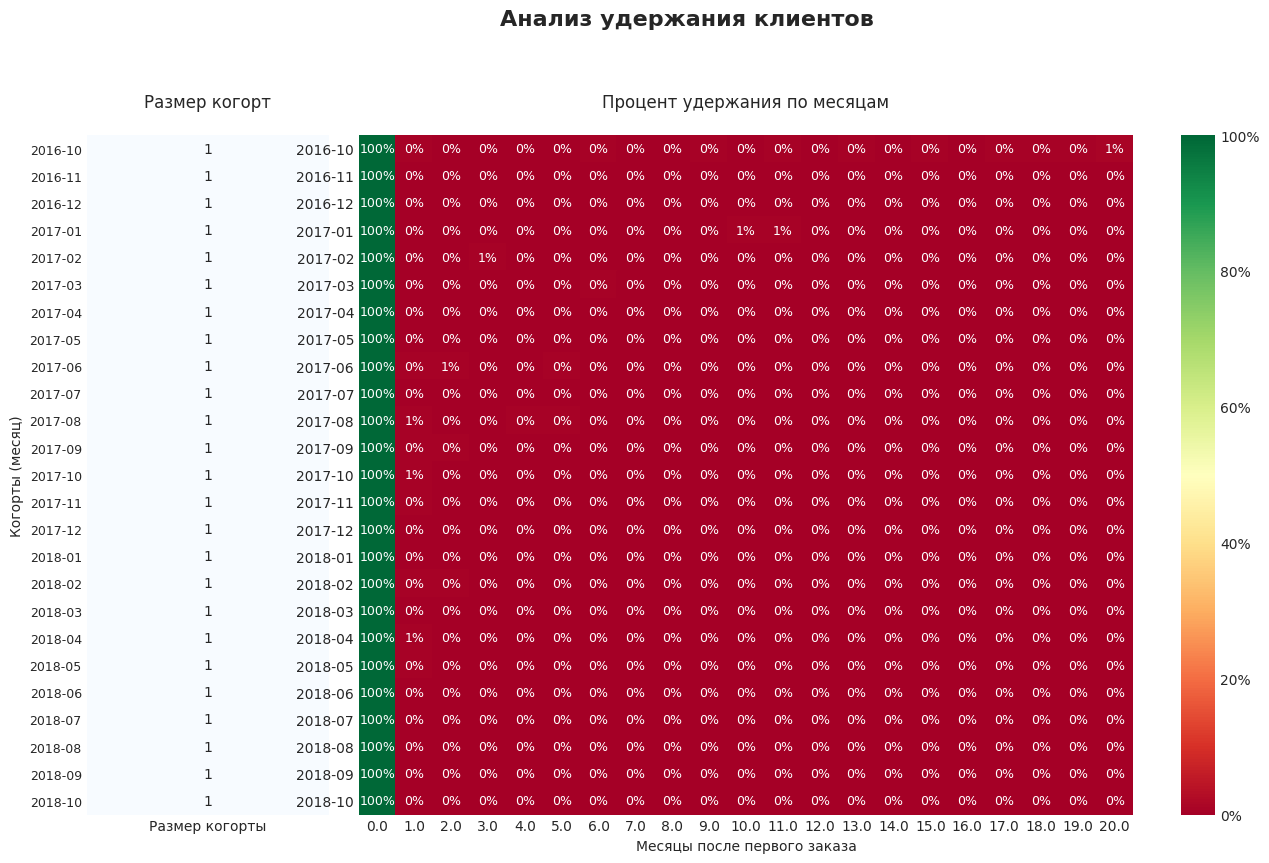

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.ticker import PercentFormatter

plt.style.use('seaborn-whitegrid')
sns.set_palette("RdYlGn")

retention_matrix = df_retention_date_pivot.copy()
cohort_size = retention_matrix[0.0].to_frame('Размер когорты')

fig = plt.figure(figsize=(16, 9), dpi=100)  # Широкоформатный размер
gs = fig.add_gridspec(1, 2, width_ratios=[1, 4], wspace=0.05)

ax0 = fig.add_subplot(gs[0])
sns.heatmap(cohort_size,
            annot=True,
            fmt=',.0f',
            cmap='Blues',
            cbar=False,
            annot_kws={'size': 10},
            ax=ax0)
ax0.set_title('Размер когорт', pad=20, fontsize=12)
ax0.tick_params(axis='y', rotation=0, labelsize=9)
ax0.set_ylabel('Когорты (месяц)', fontsize=10)

ax1 = fig.add_subplot(gs[1])
heatmap = sns.heatmap(retention_matrix,
                      mask=retention_matrix.isnull(),
                      annot=True,
                      fmt='.0%',
                      cmap='RdYlGn',
                      vmin=0,
                      vmax=1,
                      cbar_kws={'format': PercentFormatter(1.0)},
                      ax=ax1,
                      annot_kws={'size': 9})
ax1.set_title('Процент удержания по месяцам', pad=20, fontsize=12)
ax1.set_xlabel('Месяцы после первого заказа', fontsize=10)
ax1.set_ylabel('')

plt.suptitle('Анализ удержания клиентов', 
             fontsize=16, 
             y=1.02,
             fontweight='bold')


for ax in [ax0, ax1]:
    ax.grid(visible=True, 
            linestyle=':', 
            linewidth=0.5, 
            color='lightgray')

plt.tight_layout()
plt.show()

## Во всех когортных группах возврат клиентов на 2-й и 3-й месяц отсутствует, то есть product/market fit не достигнут и соответственно делаю вывод, что мы не можем масштабировать продукт.

In [46]:
delivered_order_unique = df_orders_deliveres['order_id'].unique()

### Мы хотим определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.
##### метрика 1 Gross Merchandise Volume то есть суммируем price по успешным заказам

In [47]:
gmv = df_items[df_items['order_id'].isin(delivered_order_unique)]['price'].sum()
formatted = format(gmv, ',.2f') 
formatted

'13,221,498.11'

In [48]:
df_orders_deliveres.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [49]:
df_new_merge.head()

,customer_unique_id,period_number,date_first_order,date_first_order_dateonly
0,7c396fd4830fd04220f754e42b4e5bff,1.0,2017-09-05 19:20:20,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,0.0,2017-09-05 19:20:20,2017-09
2,af07308b275d755c9edb36a90c618231,0.0,2018-08-07 15:27:45,2018-08
3,3a653a41f6f9fc3d2a113cf8398680e8,0.0,2018-08-17 18:06:29,2018-08
4,7c142cf63193a1473d2e66489a9ae977,0.0,2017-12-02 00:28:42,2017-12


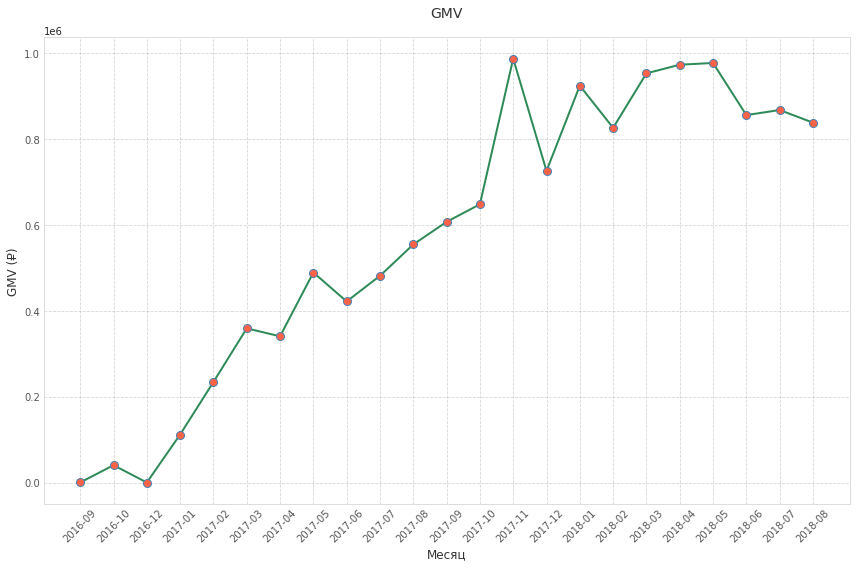

In [50]:
df_orders_deliveres['order_month'] = df_orders_deliveres['order_purchase_timestamp'].dt.to_period('M')

gmv_by_month = (
    df_items[df_items['order_id'].isin(delivered_order_unique)]
    .merge(df_orders_deliveres[['order_id', 'order_month']], on='order_id') #GMV по месяцам
    .groupby('order_month')['price']
    .sum()
)
plt.figure(figsize=(12, 8))
plt.plot(gmv_by_month.index.astype(str), gmv_by_month, 
         marker='o', 
         color='#2e8b57',  
         markerfacecolor='#ff6347',  
         markeredgecolor='#4682b4',  
         linewidth=2,
         markersize=8)

plt.title('GMV', fontsize=14, pad=20, color='#333333')
plt.xlabel('Месяц', fontsize=12, color='#333333')
plt.ylabel('GMV (₽)', fontsize=12, color='#333333')

plt.xticks(rotation=45, color='#555555')
plt.yticks(color='#555555')
plt.grid(True, linestyle='--', alpha=0.5, color='#aaaaaa')
for spine in plt.gca().spines.values():
    spine.set_color('#dddddd')

plt.tight_layout()
plt.show()

In [51]:
df_orders_deliveres.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


##### 2 метрика, я думаю можно посмотреть по активным пользователям,для справки Продакт-менеджерe Петру 
##### DAU (Daily Active Users) – ежедневные активные пользователи.
##### WAU (Weekly Active Users) – еженедельные активные.
##### MAU (Monthly Active Users) – ежемесячные активные.
##### в данном случае будем считать MAU

In [52]:
MAU_nunique = df_orders_deliveres.groupby('order_month', as_index=False).agg({'customer_id': 'nunique'})
MAU_nunique.head()

,order_month,customer_id
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,750
4,2017-02,1653


In [53]:
MAU_nunique

,order_month,customer_id
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,750
4,2017-02,1653
5,2017-03,2546
6,2017-04,2303
7,2017-05,3546
8,2017-06,3135
9,2017-07,3872


### Визуализирую результат, для удобства восприятия

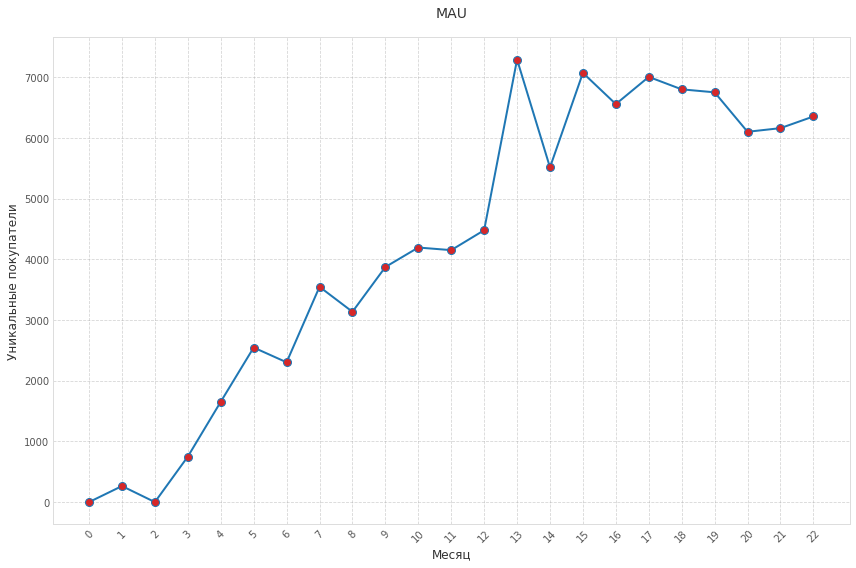

In [54]:
plt.figure(figsize=(12, 8))

plt.plot(MAU_nunique.index.astype(str), 
         MAU_nunique['customer_id'], 
         marker='o', 
         color='#1f77b4',           
         markerfacecolor='#d62728',     
         markeredgecolor='#1f77b4',     
         linewidth=2,
         markersize=8)

plt.title('MAU', fontsize=14, pad=20, color='#333333')
plt.xlabel('Месяц', fontsize=12, color='#333333')
plt.ylabel('Уникальные покупатели', fontsize=12, color='#333333')

plt.xticks(rotation=45, color='#555555')
plt.yticks(color='#555555')

plt.grid(True, linestyle='--', alpha=0.5, color='#aaaaaa')
for spine in plt.gca().spines.values():
    spine.set_color('#dddddd')

plt.tight_layout()
plt.show()

### 3 метрика будет отражать заинтересованность новых клиентов в продукте

### используем retention который рассчитали ранее

### 4 — отражать вовлеченность клиента в продолжение использования продукта.
### Stickness 
### это метрика, измеряющая способность продукта удерживать пользователей и формировать привычку регулярного использования. Она показывает, насколько часто пользователи возвращаются к продукту за определённый период.   DAU делим на MAU

In [55]:
df_orders_deliveres.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [56]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [57]:
merged_df_customer_orders = df_orders.merge(df_olist_customers, on='customer_id', how='inner')
merged_df_customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [58]:
merged_df_customer_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [59]:
dau = merged_df_customer_orders[['order_purchase_timestamp', 'customer_unique_id']].copy()

In [60]:
# # Преобразуем timestamp в формат "год-месяц-день" и "год-месяц"

dau['date_first_order_dateonly'] = dau['order_purchase_timestamp'].dt.date
dau['date_first_order_yearmonth'] = dau['order_purchase_timestamp'].dt.to_period('M')
dau.head()

,order_purchase_timestamp,customer_unique_id,date_first_order_dateonly,date_first_order_yearmonth
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,2017-10
1,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,2018-07-24,2018-07
2,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,2018-08
3,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,2017-11-18,2017-11
4,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13,2018-02


In [61]:
df_dau = dau.groupby(['date_first_order_yearmonth', 'date_first_order_dateonly'], as_index=False)\
    .agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id': 'cnt_users_day'}).copy()

df_mau = dau.groupby(['date_first_order_yearmonth'], as_index=False)\
    .agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id': 'cnt_users_month'}).copy()

df_dau_mau = df_dau.merge(df_mau, on='date_first_order_yearmonth', how='inner').copy()

In [62]:
df_dau_mau['stickness'] = df_dau_mau['cnt_users_day'] / df_dau_mau['cnt_users_month']

In [63]:
df_dau_mau

,date_first_order_yearmonth,date_first_order_dateonly,cnt_users_day,cnt_users_month,stickness
0,2016-09,2016-09-04,1,4,0.250000
1,2016-09,2016-09-05,1,4,0.250000
2,2016-09,2016-09-13,1,4,0.250000
3,2016-09,2016-09-15,1,4,0.250000
4,2016-10,2016-10-02,1,321,0.003115
...,...,...,...,...,...
629,2018-09,2018-09-29,1,14,0.071429
630,2018-10,2018-10-01,1,4,0.250000
631,2018-10,2018-10-03,1,4,0.250000
632,2018-10,2018-10-16,1,4,0.250000


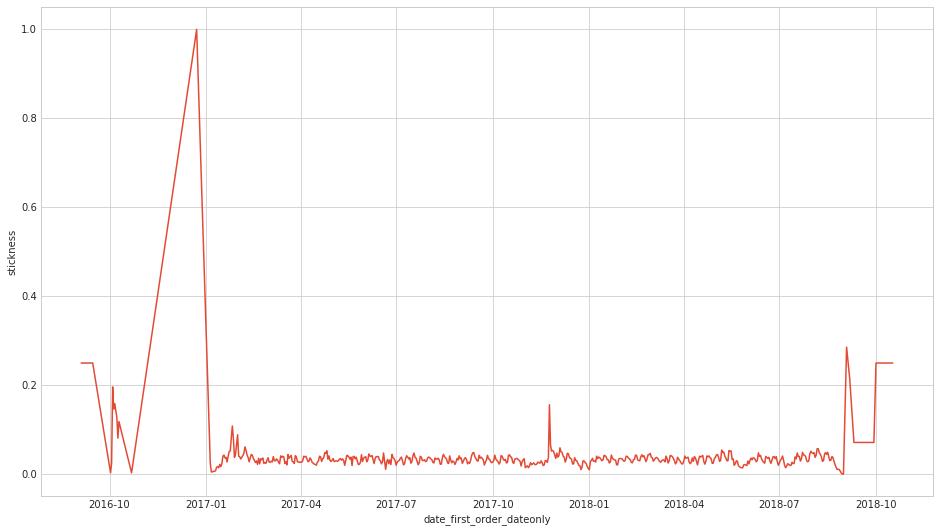

In [64]:
plt.figure(figsize=(16, 9))  # Увеличиваем размер до 16x9

sns.lineplot(x=df_dau_mau['date_first_order_dateonly'], y=df_dau_mau['stickness'])

In [65]:
print('Ср значение stickness')
print(df_dau_mau['stickness'].mean())
print('Медианное значение stickness')
print(df_dau_mau['stickness'].median())

Ср значение stickness
0.03979687052658888
Медианное значение stickness
0.033335870502867


### 5 метрика отражаем денежное выражение вовлеченности клиента.

1. ARPU - сколько денег в среднем заработали на юзерах (деньги считаем только по доставленным заказам)
2. AOV - средний чек (деньги считаем только по доставленным заказам)

In [66]:
df_order_price_sum = df_items.groupby(['order_id'], as_index=False).agg({'price': 'sum'}).rename(columns={'price': 'sum_price'})
df_order_price_sum.head()

,order_id,sum_price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [67]:
df_final_5_metrics = df_orders.merge(df_olist_customers, on='customer_id', how='inner')\
    .merge(df_order_price_sum, on='order_id', how='inner')\
    [['order_id', 'customer_unique_id', 'order_purchase_timestamp', 'sum_price']]

# Преобразуем в формат "год-месяц" (Period)
df_final_5_metrics['date_first_order_yearmonth'] = df_final_5_metrics['order_purchase_timestamp'].dt.to_period('M')

df_final_5_metrics.head()

,order_id,customer_unique_id,order_purchase_timestamp,sum_price,date_first_order_yearmonth
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,29.99,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,118.70,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,159.90,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,45.00,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,19.90,2018-02


#### ARPU

In [68]:
df_final_5_metrics.head()

,order_id,customer_unique_id,order_purchase_timestamp,sum_price,date_first_order_yearmonth
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,29.99,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,118.70,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,159.90,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,45.00,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,19.90,2018-02


In [69]:
df_final_5_arpu = df_final_5_metrics.groupby(['date_first_order_yearmonth'], as_index=False)\
    .agg({'sum_price': 'sum', 'customer_unique_id': 'nunique'})\
    .rename(columns={'customer_unique_id': 'cnt_users'})

df_final_5_arpu['arpu'] = df_final_5_arpu['sum_price'] / df_final_5_arpu['cnt_users']
df_final_5_arpu['date_first_order_yearmonth'] = df_final_5_arpu['date_first_order_yearmonth'].astype(str)

df_final_5_arpu.head()

,date_first_order_yearmonth,sum_price,cnt_users,arpu
0,2016-09,267.36,3,89.120000
1,2016-10,49507.66,305,162.320197
2,2016-12,10.90,1,10.900000
3,2017-01,120312.87,755,159.354795
4,2017-02,247303.02,1708,144.790995


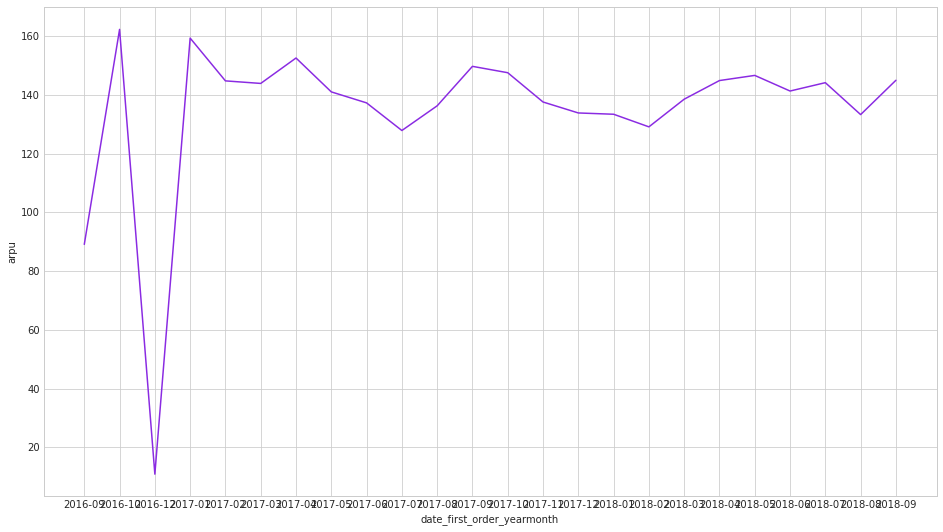

In [70]:
plt.figure(figsize=(16, 9))  # Размер графика 16x9
sns.lineplot(
    x=df_final_5_arpu['date_first_order_yearmonth'], 
    y=df_final_5_arpu['arpu'],
    color='#8A2BE2'  # Фиолетовый цвет
)

plt.show()

#### AOV

In [71]:
df_final_5_aov = df_final_5_metrics.groupby(['date_first_order_yearmonth'], as_index=False)\
    .agg({'sum_price': 'sum', 'order_id': 'nunique'})\
    .rename(columns={'order_id': 'cnt_orders'})

df_final_5_aov['aov'] = df_final_5_aov['sum_price'] / df_final_5_aov['cnt_orders']
df_final_5_aov['date_first_order_yearmonth'] = df_final_5_aov['date_first_order_yearmonth'].astype(str)

df_final_5_aov.head()

,date_first_order_yearmonth,sum_price,cnt_orders,aov
0,2016-09,267.36,3,89.120000
1,2016-10,49507.66,308,160.739156
2,2016-12,10.90,1,10.900000
3,2017-01,120312.87,789,152.487795
4,2017-02,247303.02,1733,142.702262


In [72]:
# Расчет среднего AOV
mean_aov = df_final_5_aov['aov'].mean()

print(f"Средний чек (AOV): ${mean_aov:,.2f}") 

Средний чек (AOV): $132.71


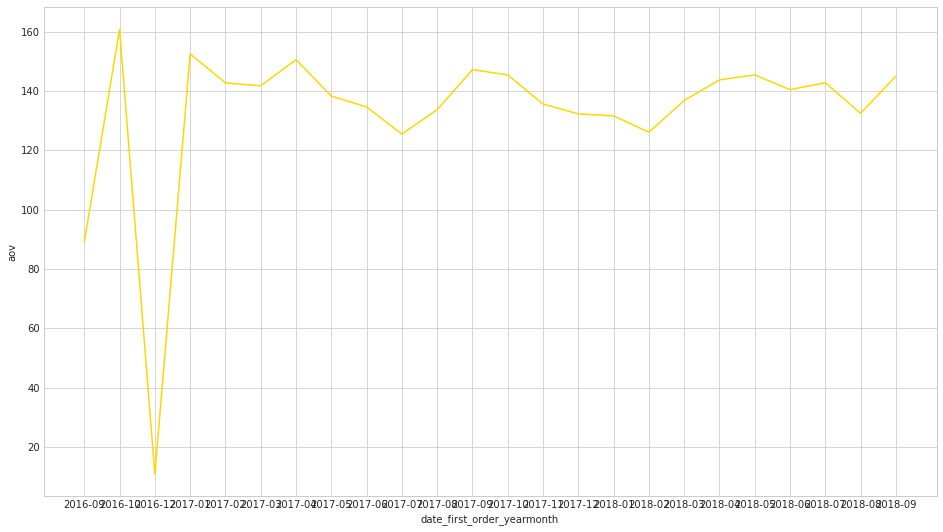

In [73]:
plt.figure(figsize=(16, 9))  # Размер графика 16x9
sns.lineplot(
    x=df_final_5_aov['date_first_order_yearmonth'], 
    y=df_final_5_aov['aov'],
    color='#FFD700'  # Жёлтый цвет
)

plt.show()


### должны рассмотреть 3 гипотезы с помощью фреймворка ICE	

In [74]:
df_orders_deliveres.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [75]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [76]:
wow_orders = df_orders[df_orders['order_status'] == 'canceled']
print(wow_orders)

                               order_id                       customer_id  \
397    1b9ecfe83cdc259250e1a8aca174f0ad  6d6b50b66d79f80827b6d96751528d30   
613    714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1058   3a129877493c8189c59c60eb71d97c29  0913cdce793684e52bbfac69d87e91fd   
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
...                                 ...                               ...   
98791  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99143  6560fb10610771449cb0463c5ba12199  0d07d0a588caf93cc66b7a8aff86d2fe   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp   order_approved_at  \
397     

In [77]:
cancelled_orders = df_orders[
    (df_orders['order_status'] == 'canceled') & 
    (df_orders['order_purchase_timestamp'] >= '2017-06-01')
].copy()


cancelled_orders['order_canceled_month'] = cancelled_orders['order_purchase_timestamp'].dt.to_period('M')

monthly_cancellations = cancelled_orders.groupby('order_canceled_month').agg(
    cancelled_orders=('order_id', 'count'),
    unique_customers=('customer_id', 'nunique')
).reset_index()
cancelled_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_canceled_month
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,2018-01
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,2018-01
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,2018-08
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,2018-09


### Для начала вычислим Impact

In [78]:
customers_kol_Bo = df_orders_deliveres[
    df_orders_deliveres['order_month'] >= pd.Period('2017-06')
]['customer_id'].nunique()
print("Клиентов с июня 2017:", customers_kol_Bo)

Клиентов с июня 2017: 85413


In [79]:
cancelled_orders = df_orders[
    (df_orders['order_status'] == 'canceled') & 
    (df_orders['order_purchase_timestamp'] >= '2017-06-01')
]
n_cancelled = len(cancelled_orders)  # Общее число отмен
print(f"Отмененных заказов с июня 2017: {n_cancelled}")

Отмененных заказов с июня 2017: 499


In [80]:
preventable_cancellations = int(n_cancelled * 0.8)  # 80% от всех отмен
print(f"Отмен, которые можно предотвратить: {preventable_cancellations}")

Отмен, которые можно предотвратить: 399


In [81]:
def impact_score(num_orders):
    ranges = {
        1: (0, 50),
        2: (51, 150),
        3: (151, 350),
        4: (351, 750),
        5: (751, 1550),
        6: (1551, 3150),
        7: (3151, 6350),
        8: (6351, 12750),
        9: (12751, 25550),
        10: (25551, float('inf'))
    }
    for score, (low, high) in ranges.items():
        if low <= num_orders <= high:
            return score
    return 1  # Если значение вне диапазонов

impact = impact_score(preventable_cancellations)
print(f"impact_score_1_hypotheses: {impact}")

impact_score_1_hypotheses: 4


In [82]:
df_orders_deliveres.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [83]:
#Гипотеза 2

In [84]:
#order_delivered_customer_date — время доставки заказа
#order_estimated_delivery_date — обещанная дата доставки

In [85]:
df_orders_deliveres.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [86]:
merged_df_customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [87]:
df_merge.head()

,order_id,customer_unique_id,date_first_order,order_delivered_customer_date,order_estimated_delivery_date,dates_diff,days_int,period_number
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-10-10 21:25:13,2017-10-18,35 days 02:04:53,35.0,1.0
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09-05 19:20:20,2017-09-05 19:20:20,2017-09-15,0 days 00:00:00,0.0,0.0
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-08-13,0 days 00:00:00,0.0,0.0
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-09-04,0 days 00:00:00,0.0,0.0
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-12-15,0 days 00:00:00,0.0,0.0


In [88]:
late_deliveries = df_merge[
    df_merge['order_delivered_customer_date'] > df_merge['order_estimated_delivery_date']
]
n_late_customers = late_deliveries['customer_unique_id'].nunique()
print(f"Клиентов с задержками доставки: {n_late_customers}")

Клиентов с задержками доставки: 7771


In [95]:
merged_orders_imp = df_orders_deliveres.merge(
    df_olist_customers, 
    on='customer_id', 
    how='inner'
)

wws_1 = merged_orders_imp.query('order_purchase_timestamp >= "2017-06-01"')


wws_1 = wws_1.query('order_delivered_customer_date > order_estimated_delivery_date') #опаздывающие заказы

wws_1 = wws_1.groupby('customer_unique_id', as_index=False).agg(
    num_of_orders=('order_id', 'nunique')
)

impact_2 = df_retention_date_pivot[1].median() * len(wws_1)
impact_2

23.670024503130957

In [97]:
impact_ranges = [
    (0, 50, 1),
    (51, 150, 2),
    (151, 350, 3),
    (351, 750, 4),
    (751, 1550, 5),
    (1551, 3150, 6),
    (3151, 6350, 7),
    (6351, 12750, 8),
    (12751, 25550, 9),
    (25551, 51150, 10)
]

impact_category = None
for min_val, max_val, category in impact_ranges:
    if min_val <= impact_2 <= max_val:
        impact_category = category
        break

print(f"impact_score_2_hypotheses = {impact_category}")

impact_score_2_hypotheses = 1


In [ ]:
#гипотеза 3 

In [113]:
customer_orders = df_orders_deliveres.merge(
    df_olist_customers[['customer_id', 'customer_unique_id']], # Объединяю в новый дф, чтобы было легче для себя
    on='customer_id',
    how='inner'
)

customer_order_counts = customer_orders.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_order_counts.columns = ['customer_unique_id', 'total_orders']

one_time_customers = customer_order_counts[customer_order_counts['total_orders'] == 1] # Клиенты только с 1 заказом
num_one_time_customers = len(one_time_customers)
one_time_customers

,customer_unique_id,total_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


In [115]:
repeat_customers = customer_order_counts[customer_order_counts['total_orders'] > 1]
repeat_customers

,customer_unique_id,total_orders
104,004288347e5e88a27ded2bb23747066c,2
243,00a39521eb40f7012db50455bf083460,2
305,00cc12a6d8b578b8ebd21ea4e2ae8b27,2
404,011575986092c30523ecb71ff10cb473,2
419,011b4adcd54683b480c4d841250a987f,2
...,...,...
92991,ff03923ad1eb9e32304deb7f9b2a45c9,2
93085,ff44401d0d8f5b9c54a47374eb48c1b8,2
93187,ff8892f7c26aa0446da53d01b18df463,2
93205,ff922bdd6bafcdf99cb90d7f39cea5b3,3


In [116]:
repeat_customers['total_orders'].max()

15

In [120]:
orders_june = customer_orders[customer_orders['order_purchase_timestamp'] >= '2017-06-01'].copy()

orders_june['order_month'] = orders_june['order_purchase_timestamp'].dt.to_period('M')

user_order_counts = orders_june.groupby('customer_unique_id')['order_id'].nunique() #количество заказов по пользователям


one_time_users = user_order_counts[user_order_counts == 1].index

impact3 = len(one_time_users) * df_retention_date_pivot[1].median()
impact3

263.18976313640076

In [121]:
impact_categories = {
    'Impact': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Диапазон': ['0-50', '51-150', '151-350', '351-750', '751-1550', 
                '1551-3150', '3151-6350', '6351-12750', '12751-25550', '25551-51150'],
    'Значение': ['', '', '263.19', '', '', '', '', '', '', '']
}

impact_table = pd.DataFrame(impact_categories)

current_category = 3  # 151-350


impact_table['Текущий'] = ['✓' if i == current_category else '' for i in range(1, 11)]

print("Таблица категорий Impact:")
print(impact_table.to_string(index=False))

Таблица категорий Impact:
 Impact     Диапазон Значение Текущий
      1         0-50                 
      2       51-150                 
      3      151-350   263.19       ✓
      4      351-750                 
      5     751-1550                 
      6    1551-3150                 
      7    3151-6350                 
      8   6351-12750                 
      9  12751-25550                 
     10  25551-51150                 


In [ ]:
#impact_score_3_hypotheses = 3 

#### Подсоединием Ease и Confidence
#### рассчитываем по фреймворку ICE

In [122]:
hypotheses = [
    {
        "Гипотеза": "Исправить баг в процессинге заказов",
        "Impact": 4,  # Ваш рассчитанный impact (1-10)
        "Confidence": 8,   # Уверенность (из вашей таблицы)
        "Ease": 6          # Простота реализации (из таблицы)
    },
    {
        "Гипотеза": "Сократить время до отгрузки",
        "Impact": 1,   # Можете использовать другой impact для этой гипотезы
        "Confidence": 10,
        "Ease": 4
    },
    {
        "Гипотеза": "Добавить новый способ оплаты",
        "Impact": 3,   # Или здесь свой impact
        "Confidence": 5,
        "Ease": 9
    }
]

df_hypotheses = pd.DataFrame(hypotheses)

df_hypotheses['ICE'] = df_hypotheses['Impact'] * df_hypotheses['Confidence'] * df_hypotheses['Ease']

df_hypotheses = df_hypotheses.sort_values('ICE', ascending=False) # Сортируем по ICE (чем выше, тем приоритетнее)
print(df_hypotheses)

                              Гипотеза  Impact  Confidence  Ease  ICE
0  Исправить баг в процессинге заказов       4           8     6  192
2         Добавить новый способ оплаты       3           5     9  135
1          Сократить время до отгрузки       1          10     4   40


### Лучшая гипотеза по фреймворку ICE будет:
### "Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен".

### Формулирую нужные метрики на которые моя гипотеза должна повлиять.
#### 1. Целевая метрика (North Star Metric) 
#### Метрика: Увеличение среднего количества повторных заказов на пользователя (Repeat Purchase Rate, RPR)
#### Прямо отражает цель гипотезы — повышение лояльности и частоты покупок.

#### 2. Прокси-метрика (Leading Indicator)
#### Метрика: Среднее время от оформления до отгрузки (Order-to-Ship Time)
#### Быстрая отгрузка — ключевой драйвер гипотезы. Если время сократится, это косвенно подтвердит её эффективность до того, как проявится влияние на RPR.

#### 3. Guardrail-метрика (Контрольная метрика)
#### Метрика: Процент отменённых заказов (Cancellation Rate)
#### Ускорение отгрузки не должно негативно влиять на качество обработки заказов. Рост отмен — сигнал к остановке теста.

## Отчет

#### По итогу проделланой работы, делаю краткий и компактный отчет для Петра:
#### В первую очередь я провел eda по имеющимся данным.
#### EDA (Exploratory Data Analysis) — это процесс исследования данных, направленный на выявление ключевых закономерностей.
#### После анализа данных, благодаря когортному анализу,  я посчитал медианный retention который равен 0.003267084127416281
#### Во всех когортных группах возврат клиентов на 2-й и 3-й месяц отсутствует, то есть product/market fit не достигнут и соответственно делаю вывод, что мы не можем масштабировать продукт
#### Почему? 
#### Мы не можем масштабировать продукт, потому что:
##### a) Клиенты не возвращаются.
##### b) Убыточность. 
##### c) Возможные проблемы с продуктом.
##### d) Но самая главная причина, что не будет роста. 


#### Также благодаря анализу определил 5 метрик , на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании
####     1 метрика  Gross Merchandise Volume (общая выручка по успешным заказам) = 13 221 498.11 рублей
####     2 метрика MAU (ежемесячно авктивные пользователи) (cм. график MAU)
####     3 метрикой выступает наш retention
####     4 метрика будет отражать вовлеченность клиента в продолжение использования продукта.
#### это метрика, измеряющая способность продукта удерживать пользователей и формировать привычку регулярного использования. Она показывает, насколько часто пользователи возвращаются к продукту за определённый период.
#### Ср значение stickness 0.03979687052658888       Медианное значение stickness 0.033335870502867
####     5 метрика отражает денежное выражение вовлеченности клиента. 
####  AOV - средний чек (деньги считаем только по доставленным заказам) =  132.71


#### Далее рассчитал impact , он оказался разным  для трех гипотез: Импакт первой гипотезы  =  4, импакт второй гипотезы = 1, импакт третьей гипотезы = 3
#### 1 гипотеза = Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.		
#### 2 гипотеза = Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 		
#### 3 гипотеза = Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.
#### по итогу исследования и благодаря фреймворку ICE мы выбираем 1 гипотезу тк она дала наилучший результат и стала более приоритетной.


### Срочные меры:
### 1. Глубокий анализ причин оттока:
#### Опросы клиентов (NPS, интервью).
#### Отыскать причины, которые мешают повторным заказам

### 2. Фиксы базовых проблем:
#### Исправить баги в процессинге (гипотеза 1).

### 3. Эксперименты для роста retention:
#### A/B-тест: Упрощение повторного заказа (гипотеза 3).
### 4. Можно попробовать внедрить программу лояльности или push-уведомления.
### 5. Не масштабировать продукт!


#### Внедрить:
#### - Целевую метрика (North Star Metric) 
#### Метрика: Увеличение среднего количества повторных заказов на пользователя (Repeat Purchase Rate, RPR)
#### Прямо отражает цель гипотезы — повышение лояльности и частоты покупок.

#### -  Прокси-метрику (Leading Indicator)
#### Метрика: Среднее время от оформления до отгрузки (Order-to-Ship Time)
#### Быстрая отгрузка — ключевой драйвер гипотезы. Если время сократится, это косвенно подтвердит её эффективность до того, как проявится влияние на RPR.

#### -  Guardrail-метрику (Контрольная метрика)
#### Метрика: Процент отменённых заказов (Cancellation Rate)
#### Ускорение отгрузки не должно негативно влиять на качество обработки заказов. Рост отмен — сигнал к остановке теста.
